<img src="https://raw.githubusercontent.com/murilovalenso/Conceitos-de-pocos-de-petroleo-e-suas-correlacoes/main/Mstar%20Oil.jpg" alt="Mstar Oil">



---

# **CASE DE TREINAMENTO** | Análise de Dados: Aprendizado de Máquina, Distâncias euclidianas para calcular a similaridade entre os poços.
Case **Técnico**<br>
Cientista de Dados [Murilo de Almeida](https://github.com/murilovalenso)

---

![Mstar](https://raw.githubusercontent.com/murilovalenso/Conceitos-de-pocos-de-petroleo-e-suas-correlacoes/main/morningstar.png)


# **Tópicos**

<ol type="1">
  <li>Dados;</li>
  <li>Análise Exploratória;</li>
  <li>Normalização;</li>
  <li>Cálculo de Similaridade (Treino);</li>
  <li>Teste (Validação);</li>
  <li>Strorytelling;</li>
  <li>Conclusão;</li>
  <li>Visualizações.</li>
</ol>

---

# **CASE DE TREINAMENTO**

## 1\. Dados

### **1.1. Pré-processamento**

Neste case, vamos utilizar uma base de dados sobre identificar informações que nos auxiliem na tomada de decisões estratégicas em
relação aos seus projetos de perfuração. A idéia é prever poços que tenham características
muito próximas uma das outras.
(variáveis preditivas).

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv('dados_pocos.csv')

In [4]:
data.head()

,Unnamed: 0,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,0,6C5G4M,1,VERTICAL,598.0,26,607.0,4
1,1,6C5G4M,2,VERTICAL,598.0,17 1/2,1306.0,4
2,2,6C5G4M,3,VERTICAL,598.0,12 1/4,1201.0,4
3,3,6C5G4M,4,VERTICAL,598.0,8 1/2,1445.0,4
4,4,8030JC,1,VERTICAL,0.0,17 1/2,410.0,3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10649 entries, 0 to 10648
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10649 non-null  int64  
 1   Nome do Poço         10649 non-null  object 
 2   Fase                 10649 non-null  int64  
 3   Tipo Poço            10649 non-null  object 
 4   LDA (Lâmina D'Água)  10649 non-null  float64
 5   Diâmetro Fase        10649 non-null  object 
 6   Metragem             10649 non-null  float64
 7   NFases               10649 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 665.7+ KB


### **1.2. Limpeza**

In [6]:
dados_pocos = data.drop(columns=['Unnamed: 0'])
dados_pocos.head()

,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,6C5G4M,1,VERTICAL,598.0,26,607.0,4
1,6C5G4M,2,VERTICAL,598.0,17 1/2,1306.0,4
2,6C5G4M,3,VERTICAL,598.0,12 1/4,1201.0,4
3,6C5G4M,4,VERTICAL,598.0,8 1/2,1445.0,4
4,8030JC,1,VERTICAL,0.0,17 1/2,410.0,3


### **1.3. Transformação**

In [7]:

# Função para converter um valor no formato polegadas para float,
# Por exemplo, fazer a conversão em polegadas de "17 1/2" para float "17.5"

def converter_para_float(valor):
    if isinstance(valor, str):  # Verifica se é uma string
        valor = valor.strip()  # Remove espaços em branco extras antes e depois da string
        if ' ' in valor:
            partes = valor.split(' ')
            if len(partes) == 2:
                numero_inteiro = float(partes[0])
                fracao = partes[1].split('/')
                numero_fracionario = float(fracao[0]) / float(fracao[1])
                return numero_inteiro + numero_fracionario
            else:
                return float(valor)  # Se não for possível dividir corretamente, converte a string inteira para float
        else:
            try:
                return float(valor)  # Tenta converter diretamente para float
            except ValueError:
                return float('NaN')  # Em caso de erro, retorna NaN (ou outro valor padrão)
    else:
        return float(valor)  # Se não for uma string, presume-se que já seja float

# Aplicar a função para converter os valores da coluna 'Diâmetro Fase' para float
dados_pocos['Diâmetro Fase'] = dados_pocos['Diâmetro Fase'].apply(converter_para_float)





In [8]:
# Mostrar o DataFrame com os valores convertidos
dados_pocos[['Diâmetro Fase']].head()

,Diâmetro Fase
0,26.00
1,17.50
2,12.25
3,8.50
4,17.50


In [9]:
#método pandas que gera estatísticas descritivas resumidas.
dados_pocos[['Diâmetro Fase']].describe().T

,count,mean,std,min,25%,50%,75%,max
Diâmetro Fase,10649.0,16.840455,8.57072,0.0,9.5,14.0,22.0,42.0


O desvio padrão dos diâmetros de broca indica a variabilidade natural desses valores. A escolha correta do diâmetro da broca é crucial para o sucesso da perfuração e para a segurança e eficiência das operações no setor de petróleo e gás.

-Eficiência de Perfuração

-Capacidade de Transporte de Fluidos

-Estabilidade do Poço

In [10]:
dados_pocos.head()

,Nome do Poço,Fase,Tipo Poço,LDA (Lâmina D'Água),Diâmetro Fase,Metragem,NFases
0,6C5G4M,1,VERTICAL,598.0,26.00,607.0,4
1,6C5G4M,2,VERTICAL,598.0,17.50,1306.0,4
2,6C5G4M,3,VERTICAL,598.0,12.25,1201.0,4
3,6C5G4M,4,VERTICAL,598.0,8.50,1445.0,4
4,8030JC,1,VERTICAL,0.0,17.50,410.0,3


## 2\. Análise Exploratória

### **2.1. Valores nulos**

A base de dados não possui valores faltantes.

In [11]:
dados_pocos.isnull().sum()

Nome do Poço           0
Fase                   0
Tipo Poço              0
LDA (Lâmina D'Água)    0
Diâmetro Fase          0
Metragem               0
NFases                 0
dtype: int64

## 3\. Normalização dos Dados



Para encontrar poços correlatos, precisamos transformar as variáveis categóricas em numéricas (se necessário) e normalizar os dados para que todas as características tenham a mesma escala.

In [12]:
# Vamos utilizar o scikit-learn para processamento e normalização de dados

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Criar um encoder para variáveis categóricas (se necessário)
# Neste caso, 'Tipo Poço' já está codificado como VERTICAL/HORIZONTAL, que podem ser convertidos em 0/1 diretamente.

# Selecionar apenas as colunas numéricas para a análise de correlação
dados_numericos = dados_pocos[['Fase', 'LDA (Lâmina D\'Água)', 'Diâmetro Fase', 'Metragem', 'NFases']]

# Normalizar os dados
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados_numericos)


## 4\. Cálculo de similaridade (Treino)

Usaremos distâncias euclidianas para calcular a similaridade entre os poços. Poços com distâncias menores são considerados mais correlatos.

In [13]:
# Vamos utilizar o Nearest Neighbors (Vizinhos Mais Próximos) para encontrar os poços mais correlatos

from sklearn.neighbors import NearestNeighbors

# Inicializar o modelo Nearest Neighbors
modelo_vizinhos = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
modelo_vizinhos.fit(dados_normalizados)

# Função para encontrar os poços mais correlatos
def encontrar_correlatos(dados, entrada, n_correlatos=4):
    # Normalizar a entrada
    entrada_normalizada = scaler.transform(entrada.reshape(1, -1))

    # Encontrar os vizinhos mais próximos
    distancias, indices = modelo_vizinhos.kneighbors(entrada_normalizada, n_neighbors=n_correlatos+1)

    # Excluir o próprio poço da lista (o mais próximo é ele mesmo)
    distancias = distancias.flatten()[1:]
    indices = indices.flatten()[1:]

    # Retornar os índices dos poços mais correlatos
    return indices



## 5\. Teste (Validação)

Vamos usar o exemplo de poço fornecido no início para encontrar os poços mais correlatos.

In [14]:
# Exemplo de entrada (dados do poço para o qual queremos encontrar correlatos)
exemplo_entrada = dados_numericos.iloc[0].values

# Encontrar poços correlatos
indices_correlatos = encontrar_correlatos(dados_normalizados, exemplo_entrada)

# Mostrar os poços correlatos encontrados
poços_correlatos = dados_pocos.iloc[indices_correlatos]
print(poços_correlatos)


      Nome do Poço  Fase   Tipo Poço  LDA (Lâmina D'Água)  Diâmetro Fase  \
3164        4BVJOY     1    VERTICAL                545.0           26.0   
2454        091G7D     1    VERTICAL                494.0           26.0   
10098       2V940M     1  DIRECIONAL                469.0           26.0   
3172        1Y5Q6F     1  DIRECIONAL                500.0           26.0   

       Metragem  NFases  
3164      543.0       4  
2454      669.0       4  
10098     667.0       4  
3172      706.0       4  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## 6\. Storytelling

- **Para entender a correlação entre os valores apresentados no conjunto de dados dos poços.**

**Vamos analisar cada uma das colunas principais:**



**.Fase:** Representa a fase específica do projeto de perfuração do poço. Neste caso, todos os poços têm a fase igual a 1, indica que os Poços que estão na mesma fase podem ter processos de perfuração semelhantes em termos de progresso.

**. Tipo Poço:** Indica o tipo de poço, sendo "VERTICAL" ou "DIRECIONAL/HOROZONTAL". Os poços mais correlatos se DIVIDEM entre o tipo "VERTICAL" e "DIRECIONAL/HORIZONTAL".

**. LDA (Lâmina D'Água):** Refere-se à profundidade da água na qual o poço está sendo perfurado. Valores mais altos indicam que o poço está em águas mais profundas. No conjunto de dados fornecido, os valores SÃO BEM PRÓXIMOS variando apenas de 469 a 545 metros. Além disso, existe a influencia de técnicas e os custos de perfuração. Poços com valores de LDA próximos podem estar sujeitos a condições ambientais e geológicas semelhantes.

**. Diâmetro Fase:** Representa o diâmetro da broca utilizada na fase específica do poço, medido em polegadas. Neste caso, todos os poços têm o mesmo diâmetro de 26 polegadas. Poços com diâmetros de broca semelhantes podem estar lidando com condições geológicas ou estratégias de perfuração semelhantes.

**. Metragem:** Refere-se ao comprimento total perfurado até a fase especificada do poço, medido em metros. Os valores variam de 543 a 706 metros. Poços com metragens semelhantes podem estar em estágios de perfuração comparáveis.

**. NFases:** Indica o número total de fases que o projeto de perfuração do poço exigiu. Neste conjunto de dados, todos os poços têm 4 fases, ou seja, a correlação de todos os poços precisam atingir até a fase 4, demonstrando ser fundamental para a operação eficiente e eficaz da Mstar Oil. Ela não apenas indica um compromisso com a execução padronizada e o cumprimento de metas, mas também serve como uma base sólida para a gestão estratégica de projetos de perfuração, garantindo consistência, qualidade e segurança em todas as operações.

- **Análise da Correlação.**

**A partir dos dados fornecidos, podemos observar o seguinte:**

**. Fase e NFases:** Todos os poços têm a mesma fase (1) e o mesmo número de fases (4), indicando que esses poços estão todos na mesma fase de um projeto de perfuração e têm a mesma complexidade em termos de fases.

**. Tipo Poço:** Os poços estão dividos entre o tipo "VERTICAL" e "DIRECIONAL/HORIZONTAL". Isso sugere que as técnicas e estratégias são eficientes em ambos os tipos de poços e condições geológicas.

**. LDA (Lâmina D'Água):** Varia consideravelmente entre os poços, o que indica que eles estão sendo perfurados em diferentes profundidades de água. Isso pode ter impacto nas técnicas e equipamentos de perfuração utilizados.

**. Diâmetro Fase:** Todos os poços têm o mesmo diâmetro de broca (26 polegadas), sugerindo que eles estão enfrentando condições de perfuração similares em termos de diâmetro de perfuração.

**. Metragem:** Varia entre os poços, indicando diferentes comprimentos perfurados até a fase específica. Isso pode refletir diferentes estágios de progresso ou eficiência na perfuração.

## 7\. Conclusão


A correlação entre esses valores mostra que os poços analisados estão em estágios semelhantes de progresso (fase 1 de 4), mas variam em termos de profundidade da água, comprimento perfurado e tipo de perfuração (vertical ou direcional/horizontal). Essas informações são cruciais para entender as condições de cada poço e podem ser utilizadas para determinar estratégias de perfuração futuras, escolha de equipamentos e otimização de processos.

 Ela não apenas indica um compromisso com a execução padronizada e o cumprimento de metas, mas também serve como uma base sólida para a gestão estratégica de projetos de perfuração, garantindo consistência, qualidade e segurança em todas as operações.





## 8\. Visualizações

 - **Gráfico de Dispersão (Scatter Plot)**

Um gráfico de dispersão é útil para visualizar a relação entre duas variáveis numéricas. Vamos usar este tipo de gráfico para examinar a relação entre a fase do poço e a metragem perfurada em cada fase.

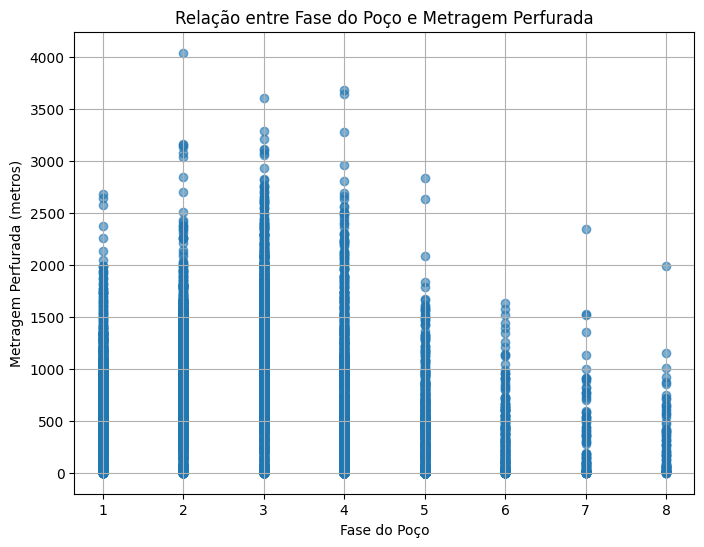

In [15]:
import matplotlib.pyplot as plt

# Vamos plotar a relação entre Fase e Metragem
plt.figure(figsize=(8, 6))
plt.scatter(dados_pocos['Fase'], dados_pocos['Metragem'], alpha=0.6)
plt.title('Relação entre Fase do Poço e Metragem Perfurada')
plt.xlabel('Fase do Poço')
plt.ylabel('Metragem Perfurada (metros)')
plt.grid(True)
plt.show()


Este gráfico de dispersão irá mostrar como a metragem perfurada aumenta conforme o poço avança nas fases. Se os poços estão seguindo um padrão típico até a fase 4, esperaríamos ver um aumento progressivo na metragem conforme a fase aumenta.

- **Gráfico de Barras (Bar Plot)**

Para variáveis categóricas ou discretas, como o Tipo de Poço, um gráfico de barras pode ser mais apropriado. Ele mostra a distribuição de cada categoria ao longo das fases.

<Figure size 1000x600 with 0 Axes>

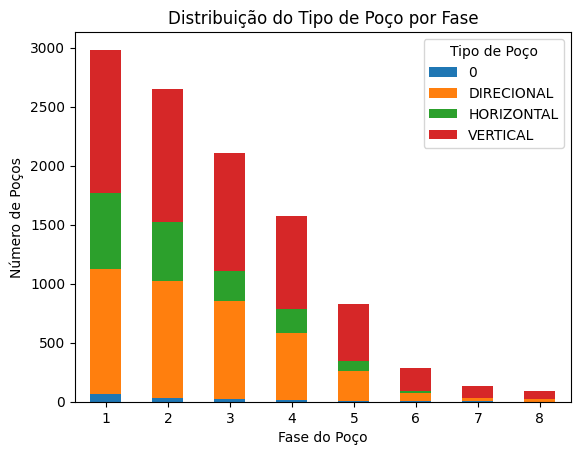

In [16]:
# Vamos criar um gráfico de barras para mostrar a distribuição do Tipo de Poço por Fase
plt.figure(figsize=(10, 6))
dados_pocos.groupby(['Fase', 'Tipo Poço']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribuição do Tipo de Poço por Fase')
plt.xlabel('Fase do Poço')
plt.ylabel('Número de Poços')
plt.legend(title='Tipo de Poço')
plt.xticks(rotation=0)
plt.show()


Este gráfico de barras empilhadas mostrará como a distribuição dos diferentes tipos de poço (vertical, horizontal, direcional) varia conforme as fases do projeto de perfuração. Pode revelar padrões interessantes sobre a preferência ou eficácia de diferentes tipos de poço em diferentes estágios do projeto.

- **Mapa de Calor (Heatmap) ou Matriz de Correlação**

O mapa de calor nos mostrará a relação linear entre as variáveis do conjunto de dados. Ele coloca as variáveis em um eixo X e um eixo Y, indicando (dentro de um quadrado) a correlação entre elas. O valor da correlação varia de -1 até 1.

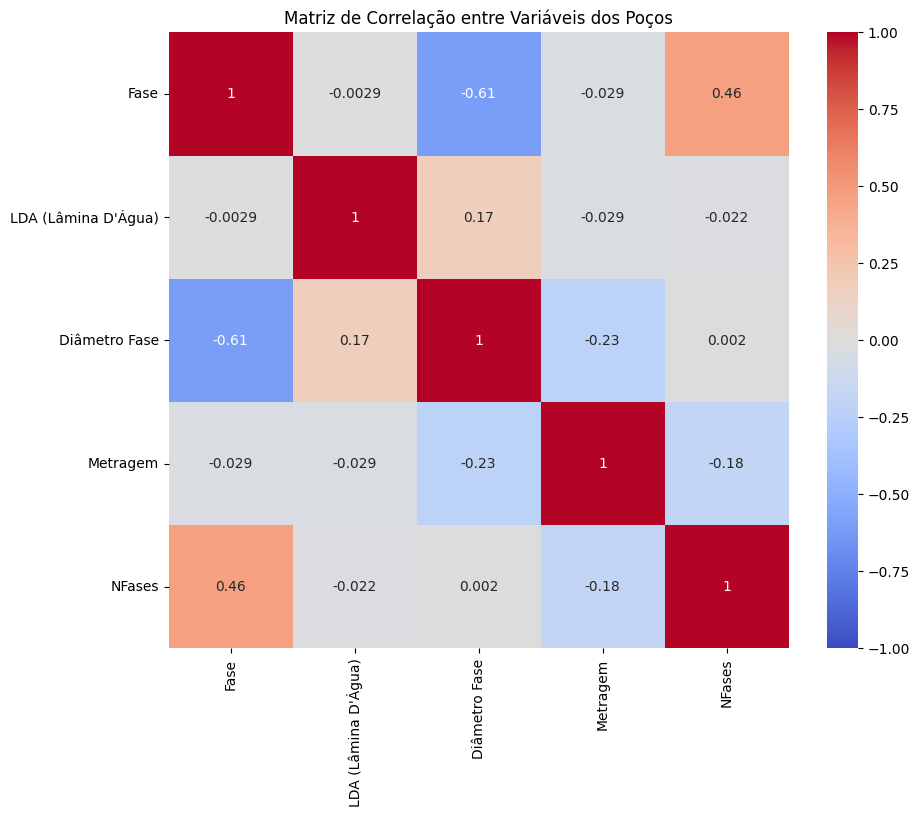

In [17]:
# Selecionando apenas variáveis numéricas para a matriz de correlação
dados_numericos = dados_pocos[['Fase', 'LDA (Lâmina D\'Água)', 'Diâmetro Fase', 'Metragem', 'NFases']]

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Plotando a matriz de correlação usando heatmap do seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis dos Poços')
plt.show()


**Considerações finais:**

Cada um desses gráficos pode fornecer insights valiosos sobre como as diferentes variáveis estão correlacionadas com as fases dos poços. A escolha do tipo de gráfico depende do tipo de variáveis que queremos explorar e do tipo de relação que estamos tentando entender. Essas visualizações são fundamentais para uma análise exploratória de dados eficaz na Mstar Oil, facilitando a compreensão dos padrões e tendências nos projetos de perfuração.

Portanto, é crucial selecionar as ferramentas e estratégias adequadas para otimizar a eficiência na exploração de poços de petróleo. No entanto, os resultados da exploração tendem a ser mais eficazes em ambientes geológicos favoráveis. Em outras palavras, a eficiência na exploração de um poço de petróleo específico é significativamente reduzida em condições geológicas desfavoráveis, mesmo com a utilização das mais modernas ferramentas e estratégias disponíveis.

---